In [ ]:
import drama as drm
from drama.v1.outlier_finder import D_Drama
import numpy as np
import matplotlib.pylab as plt
from matplotlib import gridspec
from drama.run_tools import synt_event

%matplotlib inline

In [9]:
i_sig = 1 # signal number
n_ftrs = 100 
noise = 0.1
scl = 0.01
sft = 0.01

X, y = synt_event(i_sig,n_ftrs,
                  n_inlier=2000,
                  n_outlier=100,
                  sigma = noise,n1 = scl,n2 = sft,n3 = scl,n4 = sft)
X.shape, y.shape

((2100, 100), (2100,))

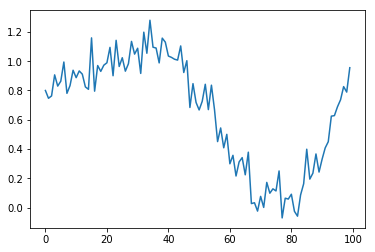

In [10]:
plt.plot(X[0])

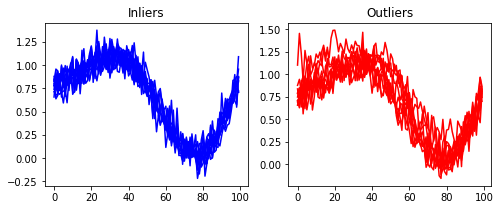

In [11]:
gs = gridspec.GridSpec(1, 2)
plt.figure(figsize=(8,3)) 
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax1.set_title('Inliers')
ax2.set_title('Outliers')

inliers = X[y==0]
outliers = X[y==1]
for i in range(10):
    ax1.plot(inliers[i],'b')
    ax2.plot(outliers[i],'r')

In [2]:
drt_list = ['AE','VAE','PCA','NMF','FastICA']
all_metrics = ['cityblock','L2','L4','braycurtis',
           'canberra','chebyshev','correlation','mahalanobis',
           'wL2','wL4']

In [31]:
d_drama = D_Drama(X_seen = X,drt_name = 'PCA')

In [32]:
n_split = 2
for nsp in range(n_split):
    outliers_rep = d_drama(X_unseen=X, n_split = 1)

In [38]:
o1 = outliers_rep['real']['L2']

In [39]:
inds = np.argsort(o1)

In [40]:
o1[inds[0]]

0.7863514544982618

In [41]:
o1[inds[-1]]

1.8760365340292522

In [42]:
np.mean(y[inds[-100:]])

0.76